In [ ]:
#!pip install easyocr #https://www.jaided.ai/easyocr/documentation/

In [39]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [2]:
# here you can use any other language you want
Reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [92]:
def select_text(path):
    image = cv2.imread(path)
    output = Reader.readtext(path,decoder='beamsearch')
    text =[]
    for out in output:
        cord=out[0]
        text.append(out[1])
        # here we are only using first text form the image to show the bounding
        x_min, y_min = [int(min(idx)) for idx in zip(*cord)]
        x_max, y_max = [int(max(idx)) for idx in zip(*cord)]
        # using matplotlib to show the bounding box rectangle around the text in image
        cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return text

['POR', '2 .', 'ESP']

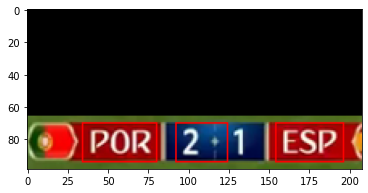

In [93]:
select_text('Downloads/s.png')

['FULLTIME SCORES', '2-1', '0-0', '6-0', '1-', '2-1']

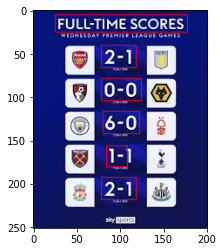

In [95]:
select_text('Downloads/download.jpeg')

['It was the best of',
 'times, it was the worst',
 'of times, it was the age',
 'of wisdom; it was the',
 'age of foolishness .']

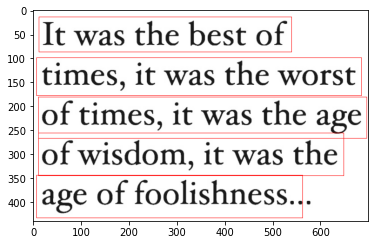

In [96]:
select_text('Downloads/chechk.png')